In [78]:
# planteamento paramentros de entrada
inicial = 1 #nodo inicial
final =10#Nodo final
costoViaje_max =7#costo maximo


alpha= 0.45 #Importancia de cantidad de rutas
beta=0.1 #Importancia de transbordos
epsilon=0.45# Importancia del costo

In [79]:
rutas_totales=7
rutas_estaciones=13

tabla_costos =[]
tabla_rutas=[]


In [80]:

data={

    (10,7,1):1,(7,5,1):1,(5,3,1):1,
    (10,8,2):1,(8,4,1):1,(4,3,1):1,
    (10,9,3):1,
    (10,9,4):1,(9,8,4):1, (8,7,4):1,(7,6,4):1, (6,5,4):1,(5,4,4):1,(4,3,4):1,
    (3,4,5):1,(4,7,5):1, (7,8,5):1,(8,10,5):1,
    (3,5,6):1,(5,7,6):1, (7,10,6):1,
    (10,8,7):1,(8,7,7):1, (7,4,7):1,(4,3,7):1,
    (3,4,8):1,(4,8,8):1, (8,10,8):1,
    (3,4,9):1,(4,5,9):1, (5,4,9):1,(5,6,9):1, (6,7,9):1, (7,8,9):1,(9,10,9):1,
    (1,14,10):1,(14,2,10):1,(2,12,10):1, (12,13,10):1, (13,15,10):1,(15,7,10):1,
    (1,14,11):1,(14,11,11):1, (11,6,11):1


}
graph_enlaces = {}
for coneccion, enlace in data.items():
    i, j, k = coneccion
    if i not in graph_enlaces:
        graph_enlaces[i] = []
    if j not in graph_enlaces:
        graph_enlaces[j] = []
    graph_enlaces[i].append([j, k, enlace*alpha])
data_cost={


    (11,6,11):3,
    (4,8,8):3




}
for coneccion, costo in data_cost.items():
      i, j, k = coneccion
      lst_conecciones=graph_enlaces[i]
      for x in range(0,len(lst_conecciones)):
        if lst_conecciones[x][0]==j and lst_conecciones[x][1]==k:
            graph_enlaces[i][x][2]=epsilon*costo+graph_enlaces[i][x][2]



In [81]:
class Node:
  def __init__(self):
      self.d=float('inf') #current distance from source node
      self.parent=None
      self.finished=False
      self.route=None

In [82]:
import heapq

def dijkstra(graph, inic):
  distancia ={node: Node() for node in graph}
  distancia[inic].d=0
  visitando=[(0,inic, None)]
  while visitando:
    distancia_actual, nodo_actual,ruta_actual = heapq.heappop(visitando)

    if distancia[nodo_actual].finished:
      continue

    distancia[nodo_actual].finished =True
    for vecinos, ruta, weight  in graph[nodo_actual]:

      if ruta != ruta_actual:
        cambio_ruta = beta
      else:
        cambio_ruta=0
      costo_calc = distancia[nodo_actual].d+weight+cambio_ruta
      if costo_calc < distancia[vecinos].d:
        distancia[vecinos].d=costo_calc
        distancia[vecinos].parent=nodo_actual
        distancia[vecinos].route=ruta
        heapq.heappush(visitando, (costo_calc, vecinos, ruta))
  return distancia

path=dijkstra(graph_enlaces,inicial)


In [83]:
def contruct_path(distancias, end, inic):
    path = [end]
    terminar = False
    node= end
    ruta =[ ]

    while not terminar :
     path.insert(0, distancias[node].parent)
     ruta.insert(0, distancias[node].route)

     node= distancias[node].parent
     if (node ==inic):
      terminar = True
    return path, ruta

nodes_path, routes =contruct_path(path,final,inicial)

In [84]:

coordenadas = {
    1: [0, 0],
    2: [5, 0],
    3: [1, 4],
    4: [2, 4],
    5: [3, 4],
    6: [4, 4],
    7: [5, 4],
    8: [6, 4],
    9: [7, 4],
    10: [9, 4],
    11: [4, 0],
    12: [6, 0],
    13: [7, 0],
    14: [2, 0],
    15: [8, 0]
}

print(routes)

[10, 10, 10, 10, 10, 10, 6]


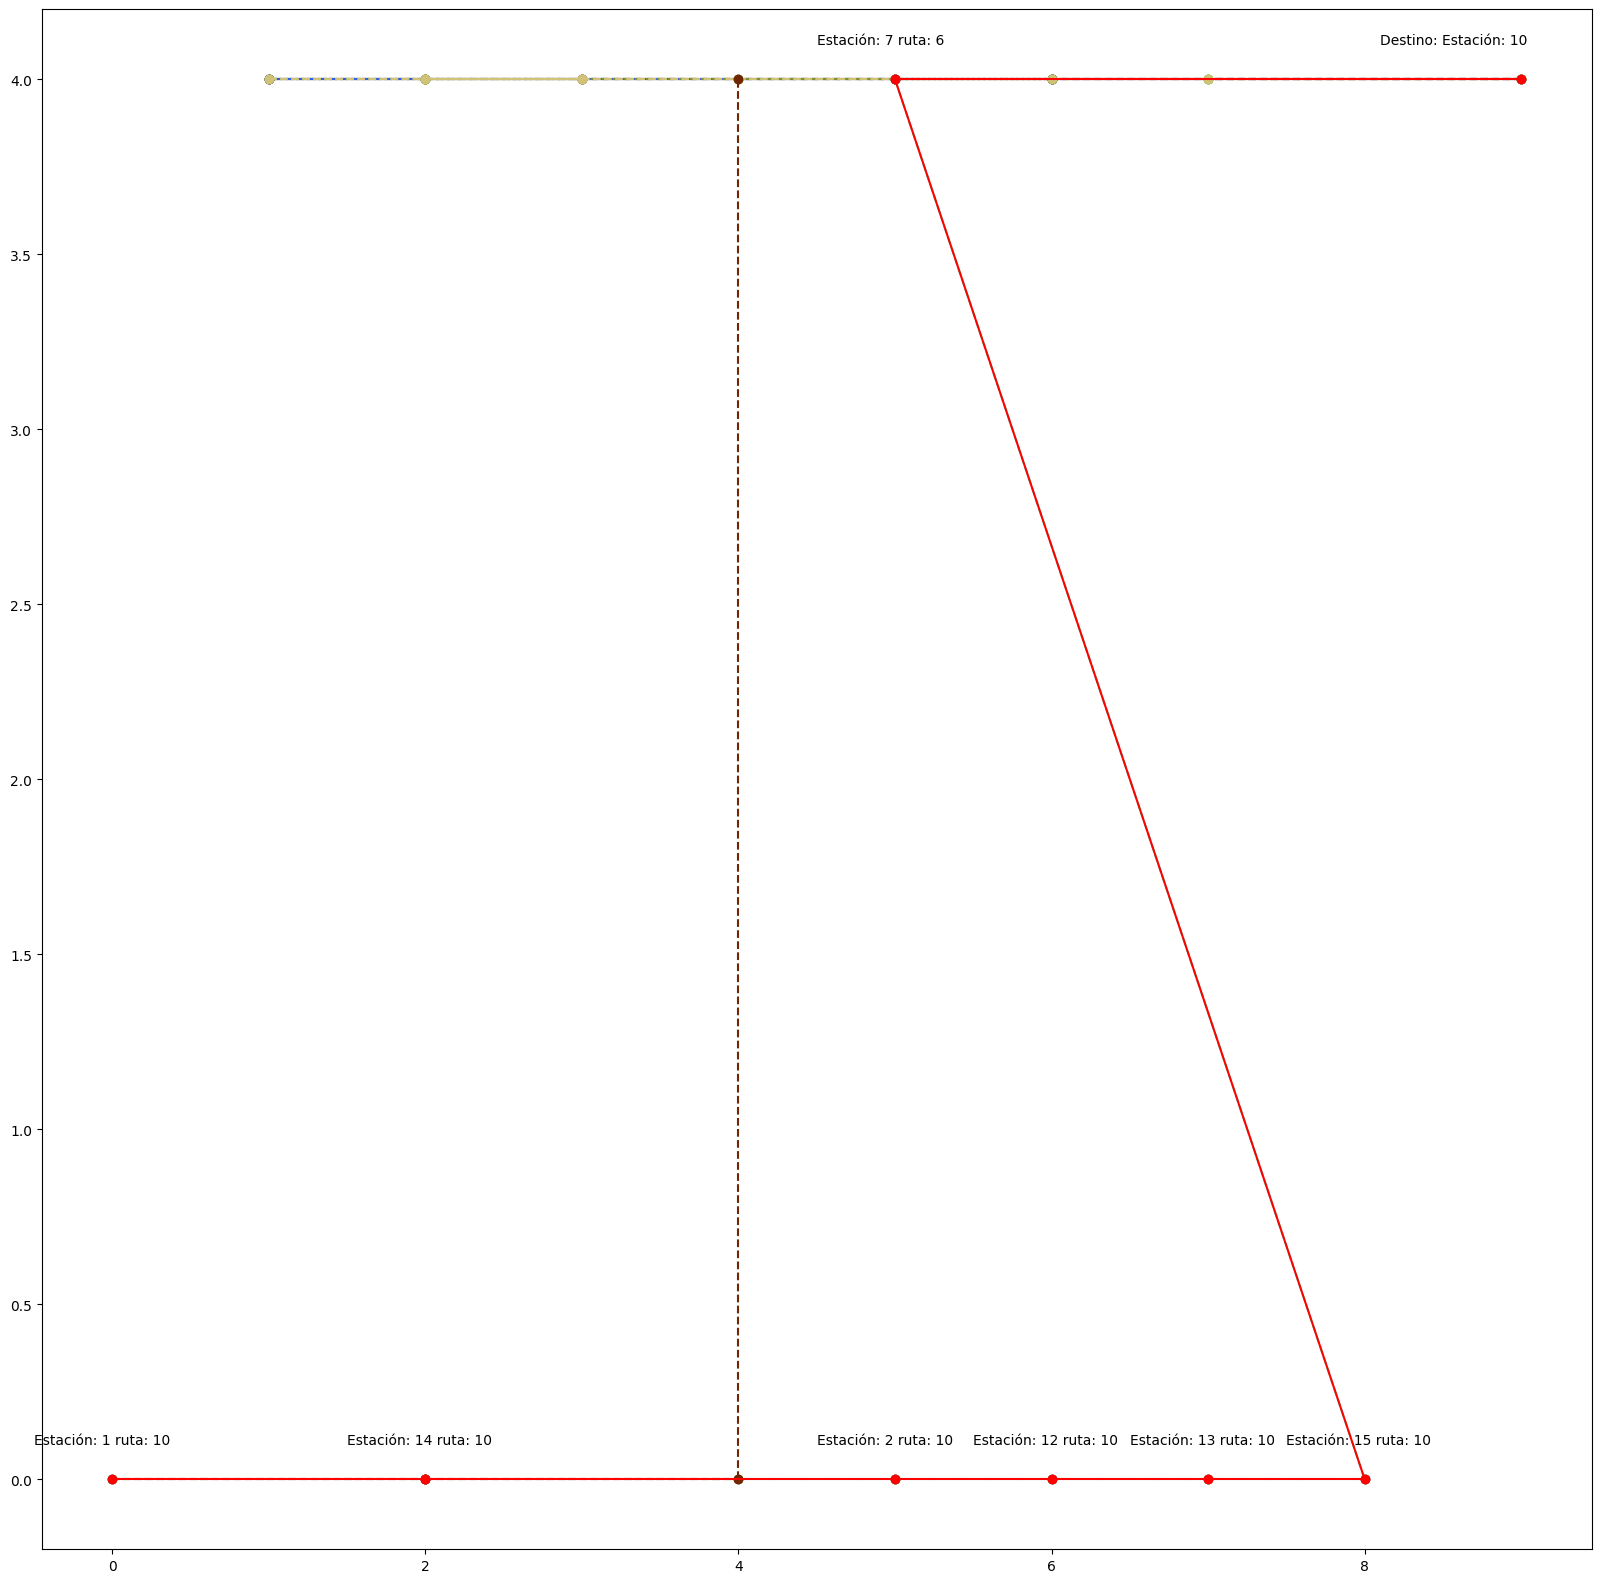

In [85]:
import matplotlib.pyplot as plt
def generar_color(k):
    red = (k * 80) % 256
    green = (k * 50) % 256
    blue = (k * 70) % 256
    return (red/255, green/255, blue/255)

x =[]
y=[]
k=[]
for key, value in data.items():
    x.append(key[0])#Nodo inicio
    y.append(key[1])#nodo fin
    k.append(key[2])#ruta


figure_1 = plt.figure(figsize=(20, 20))
ax_1 = figure_1.add_subplot(1,1,1)


for i in range(0,len(x)):

            lines_x=[coordenadas[x[i]][0],coordenadas[y[i]][0]]
            lines_y=[coordenadas[x[i]][1],coordenadas[y[i]][1]]
            colors=generar_color(k[i])


            ax_1.plot(lines_x,lines_y,"--", color=colors,marker='o')

for j in range(0, len(nodes_path)-1):


          lines_x=[coordenadas[nodes_path[j]][0],coordenadas[nodes_path[j+1]][0]]
          lines_y=[coordenadas[nodes_path[j]][1],coordenadas[nodes_path[j+1]][1]]
          ax_1.plot(lines_x,lines_y,color="red",marker='o')
          ax_1.text(coordenadas[nodes_path[j]][0]-0.5,coordenadas[nodes_path[j]][1]+0.1,"Estación: "+str(nodes_path[j])+" ruta: "+ str(routes[j]), size=10 )

size_len = len(nodes_path)-1
ax_1.text(coordenadas[nodes_path[size_len]][0]-0.9,coordenadas[nodes_path[size_len]][1]+0.1,"Destino: Estación: "+str(nodes_path[size_len]), size=10 )

plt.show()
